<a href="https://colab.research.google.com/github/neeraja1504/Summer-Project/blob/main/Document_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PDF to text

# PDF to text

## PyPDF2

In [2]:
#installing all the required libraries.
!pip install PyPDF2

     |████████████████████████████████| 77 kB 3.8 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61100 sha256=a51a963849d7896a6b74b07efe478a963632c57e260ebedb776cdddfca2d1846
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [3]:
#converting pdf to text.
import PyPDF2
text=''
text1=''
FILE_PATH = '/content/drive/MyDrive/Neeraja/hist-eng.pdf'

with open(FILE_PATH, mode='rb') as f:

    reader = PyPDF2.PdfFileReader(f)
    num=reader.getNumPages()
    for i in range(num):
      page=reader.getPage(i)
      text=text+page.extractText()
    print(text) 
    text1=(reader.getPage(1)).extractText() 

    

29Nationalism  in  IndiaAs you have seen, modern nationalism in Europe came to beassociated with the formation of nation-states. It also meant a changein people™s understanding of who they were, and what defined theiridentity and sense of belonging. New symbols and icons, new songsand ideas forged new links and redefined the boundaries ofcommunities. In most countries the making of this new nationalidentity was a long process. How did this consciousness emergein India?In India and as in  many other colonies, the growth of modernnationalism is intimately connected to the anti-colonial movement.
People began discovering their unity in the process of their strugglewith colonialism. The sense of being oppressed under colonialism
provided a shared bond that tied many different groups together.But each class and g
roup felt the effects of colonialism differently,
their experiences were varied, and their notions of freedom were
not always the same.  The Congress under Mahatma Gandhi tried
to 

## PyMuPDF

In [11]:

!pip install fitz
!pip install PyMuPDF
import fitz

doc = fitz.open("/content/drive/MyDrive/Neeraja/hist-eng.pdf")
#text = page.getText("text")

In [12]:
text=""
for i in range(0,22):
  page=doc[i]
  text = text + page.getText("text")
print(text)  

29
Nationalism  in  India
As you have seen, modern nationalism in Europe came to be
associated with the formation of nation-states. It also meant a change
in people’s understanding of who they were, and what defined their
identity and sense of belonging. New symbols and icons, new songs
and ideas forged new links and redefined the boundaries of
communities. In most countries the making of this new national
identity was a long process. How did this consciousness emerge
in India?
In India and as in  many other colonies, the growth of modern
nationalism is intimately connected to the anti-colonial movement.
People began discovering their unity in the process of their struggle
with colonialism. The sense of being oppressed under colonialism
provided a shared bond that tied many different groups together.
But each class and group felt the effects of colonialism differently,
their experiences were varied, and their notions of freedom were
not always the same.  The Congress under Mahatma Gand

## html format 

In [ ]:
from operator import itemgetter
import fitz
import json


def fonts(doc, granularity=False):
    """Extracts fonts and their usage in PDF documents.
    :param doc: PDF document to iterate through
    :type doc: <class 'fitz.fitz.Document'>
    :param granularity: also use 'font', 'flags' and 'color' to discriminate text
    :type granularity: bool
    :rtype: [(font_size, count), (font_size, count}], dict
    :return: most used fonts sorted by count, font style information
    """
    styles = {}
    font_counts = {}

    for page in doc:
        blocks = page.getText("dict")["blocks"]
        for b in blocks:  # iterate through the text blocks
            if b['type'] == 0:  # block contains text
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        if granularity:
                            identifier = "{0}_{1}_{2}_{3}".format(s['size'], s['flags'], s['font'], s['color'])
                            styles[identifier] = {'size': s['size'], 'flags': s['flags'], 'font': s['font'],
                                                  'color': s['color']}
                        else:
                            identifier = "{0}".format(s['size'])
                            styles[identifier] = {'size': s['size'], 'font': s['font']}

                        font_counts[identifier] = font_counts.get(identifier, 0) + 1  # count the fonts usage

    font_counts = sorted(font_counts.items(), key=itemgetter(1), reverse=True)

    if len(font_counts) < 1:
        raise ValueError("Zero discriminating fonts found!")

    return font_counts, styles


def font_tags(font_counts, styles):
    """Returns dictionary with font sizes as keys and tags as value.
    :param font_counts: (font_size, count) for all fonts occuring in document
    :type font_counts: list
    :param styles: all styles found in the document
    :type styles: dict
    :rtype: dict
    :return: all element tags based on font-sizes
    """
    p_style = styles[font_counts[0][0]]  # get style for most used font by count (paragraph)
    p_size = p_style['size']  # get the paragraph's size

    # sorting the font sizes high to low, so that we can append the right integer to each tag
    font_sizes = []
    for (font_size, count) in font_counts:
        font_sizes.append(float(font_size))
    font_sizes.sort(reverse=True)

    # aggregating the tags for each font size
    idx = 0
    size_tag = {}
    for size in font_sizes:
        idx += 1
        if size == p_size:
            idx = 0
            size_tag[size] = '<p>'
        if size > p_size:
            size_tag[size] = '<h{0}>'.format(idx)
        elif size < p_size:
            size_tag[size] = '<s{0}>'.format(idx)

    return size_tag


def headers_para(doc, size_tag):
    """Scrapes headers & paragraphs from PDF and return texts with element tags.
    :param doc: PDF document to iterate through
    :type doc: <class 'fitz.fitz.Document'>
    :param size_tag: textual element tags for each size
    :type size_tag: dict
    :rtype: list
    :return: texts with pre-prended element tags
    """
    header_para = []  # list with headers and paragraphs
    first = True  # boolean operator for first header
    previous_s = {}  # previous span

    for page in doc:
        blocks = page.getText("dict")["blocks"]
        for b in blocks:  # iterate through the text blocks
            if b['type'] == 0:  # this block contains text

                # REMEMBER: multiple fonts and sizes are possible IN one block

                block_string = ""  # text found in block
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        if s['text'].strip():  # removing whitespaces:
                            if first:
                                previous_s = s
                                first = False
                                block_string = size_tag[s['size']] + s['text']
                            else:
                                if s['size'] == previous_s['size']:

                                    if block_string and all((c == "|") for c in block_string):
                                        # block_string only contains pipes
                                        block_string = size_tag[s['size']] + s['text']
                                    if block_string == "":
                                        # new block has started, so append size tag
                                        block_string = size_tag[s['size']] + s['text']
                                    else:  # in the same block, so concatenate strings
                                        block_string += " " + s['text']

                                else:
                                    header_para.append(block_string)
                                    block_string = size_tag[s['size']] + s['text']

                                previous_s = s

                    # new block started, indicating with a pipe
                    block_string += "|"

                header_para.append(block_string)

    return header_para


def main():

    document = '/content/jess302.pdf'
    doc = fitz.open(document)

    font_counts, styles = fonts(doc, granularity=False)

    size_tag = font_tags(font_counts, styles)

    elements = headers_para(doc, size_tag)

    with open("/content/doc.json", 'w') as json_out:
        json.dump(elements, json_out)


if __name__ == '__main__':
    main()

In [ ]:
import json
  
# Opening JSON file
f = open('/content/doc.json',)
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list
for i in data:
    print(i)
  
# Closing file
f.close()

In [ ]:
!pip install pdfminer
!pip install pdfminer.high_level
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar,LTLine,LAParams
import os
path=r'/content/jess302.pdf'
os.chdir(path)
Extract_Data=[]
for PDF_file in os.listdir():
    if PDF_file.endswith('.pdf'):
       for page_layout in extract_pages(PDF_file):
            for element in page_layout:
                if isinstance(element, LTTextContainer):
                    for text_line in element:
                        for character in text_line:
                            if isinstance(character, LTChar):
                                Font_size=character.size
                    Extract_Data.append([Font_size,(element.get_text())])

# Sentence Splitting

## nltk

In [13]:
pip install transformers

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
#print(text1)
stop=0
for i in text:
  if(i=='.'):
    stop=stop+1
print(stop)

492


In [ ]:
from nltk.tokenize import sent_tokenize
list=[]
count=0
list=sent_tokenize(text)
for i in list:
  count=count+1
  print(i,'\n')
print(count) 

## spacy

In [17]:
!pip install spacy
from __future__ import unicode_literals, print_function
from spacy.lang.en import English # updated

raw_text = 'Hello, world. Here are two sentences.'
nlp = English()
nlp.add_pipe(nlp.create_pipe('sentencizer')) # updated
doc = nlp(text)
sentences = [sent.string.strip() for sent in doc.sents]
for i in sentences:
  print(i,"\n")
print(len(sentences)) 

29
Nationalism  in  India
As you have seen, modern nationalism in Europe came to be
associated with the formation of nation-states. 

It also meant a change
in people’s understanding of who they were, and what defined their
identity and sense of belonging. 

New symbols and icons, new songs
and ideas forged new links and redefined the boundaries of
communities. 

In most countries the making of this new national
identity was a long process. 

How did this consciousness emerge
in India? 

In India and as in  many other colonies, the growth of modern
nationalism is intimately connected to the anti-colonial movement. 

People began discovering their unity in the process of their struggle
with colonialism. 

The sense of being oppressed under colonialism
provided a shared bond that tied many different groups together. 

But each class and group felt the effects of colonialism differently,
their experiences were varied, and their notions of freedom were
not always the same. 

The Congress u

# Named Entity Recognition

## bert

Accuracy of sentence splitting using spacy for nosiy data is 94%

In [ ]:
#does not work for large texts.
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Pune.Rajasthan is a great state."
for i in list:
  ner_results = nlp(i)
  print(ner_results)
#print(nlp(example))
#result=nlp(text)
#print(result)



[{'entity': 'B-LOC', 'score': 0.999495, 'index': 5, 'word': 'India', 'start': 20, 'end': 25}, {'entity': 'B-LOC', 'score': 0.99978364, 'index': 14, 'word': 'Europe', 'start': 66, 'end': 72}]
[]
[]
[]
[{'entity': 'B-LOC', 'score': 0.99983853, 'index': 7, 'word': 'India', 'start': 37, 'end': 42}]
[{'entity': 'B-LOC', 'score': 0.99975735, 'index': 2, 'word': 'India', 'start': 3, 'end': 8}]
[]
[]
[]
[{'entity': 'B-ORG', 'score': 0.99734956, 'index': 2, 'word': 'Congress', 'start': 4, 'end': 12}, {'entity': 'B-PER', 'score': 0.9995074, 'index': 4, 'word': 'Ma', 'start': 19, 'end': 21}, {'entity': 'B-PER', 'score': 0.7524078, 'index': 5, 'word': '##hat', 'start': 21, 'end': 24}, {'entity': 'B-PER', 'score': 0.9437847, 'index': 6, 'word': '##ma', 'start': 24, 'end': 26}, {'entity': 'I-PER', 'score': 0.99900043, 'index': 7, 'word': 'Gandhi', 'start': 27, 'end': 33}]
[]
[{'entity': 'B-LOC', 'score': 0.99981296, 'index': 14, 'word': 'India', 'start': 72, 'end': 77}]
[{'entity': 'B-ORG', 'score'

In [ ]:
for i in result:
  print(i)

{'entity': 'B-LOC', 'score': 0.99931693, 'index': 5, 'word': 'India', 'start': 20, 'end': 25}
{'entity': 'B-LOC', 'score': 0.9997613, 'index': 14, 'word': 'Europe', 'start': 66, 'end': 72}
{'entity': 'B-LOC', 'score': 0.9997737, 'index': 94, 'word': 'India', 'start': 476, 'end': 481}
{'entity': 'B-LOC', 'score': 0.99977344, 'index': 97, 'word': 'India', 'start': 486, 'end': 491}
{'entity': 'B-ORG', 'score': 0.99834085, 'index': 186, 'word': 'Congress', 'start': 973, 'end': 981}
{'entity': 'B-PER', 'score': 0.9962473, 'index': 188, 'word': 'Ma', 'start': 988, 'end': 990}
{'entity': 'B-PER', 'score': 0.5860444, 'index': 189, 'word': '##hat', 'start': 990, 'end': 993}
{'entity': 'B-PER', 'score': 0.5426429, 'index': 190, 'word': '##ma', 'start': 993, 'end': 995}
{'entity': 'I-PER', 'score': 0.91112596, 'index': 191, 'word': 'Gandhi', 'start': 996, 'end': 1002}
{'entity': 'B-LOC', 'score': 0.9997394, 'index': 224, 'word': 'India', 'start': 1180, 'end': 1185}
{'entity': 'B-ORG', 'score': 0.

In [ ]:
for i in list:
  ner_results = nlp(i)
  print(i,ner_results,'\n')


## Spacy

In [7]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 11.1 MB 8.7 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.1.0-py3-none-any.whl size=11074432 sha256=6a4620dd580e2611b15b11925e337be27018402f2dbea6b5236a5fa921ef385e
  Stored in directory: /tmp/pip-ephem-wheel-cache-9edhr4nk/wheels/59/4f/8c/0dbaab09a776d1fa3740e9465078bfd903cc22f3985382b496
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [8]:
#using spacy for named entity recognition
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm 
nlp = en_core_web_sm.load()

In [9]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [ ]:
doc1=nlp(text)
i=0
print([(X.text, X.label_) for X in doc1.ents],"\n")
for X in doc1.ents:
  print((X.text, X.label_))
 
print(i)  

[('29', 'CARDINAL'), ('India', 'GPE'), ('Europe', 'LOC'), ('India', 'GPE'), ('India', 'GPE'), ('Congress', 'ORG'), ('Mahatma Gandhi', 'PERSON'), ('one', 'CARDINAL'), ('India', 'GPE'), ('the first decade', 'DATE'), ('the twentieth century', 'DATE'), ('the 1920s', 'DATE'), ('Congress', 'ORG'), ('India', 'GPE'), ('India', 'GPE'), ('1', 'CARDINAL'), ('6 April 1919', 'DATE'), ('2020-21', 'CARDINAL'), ('India', 'GPE'), ('the Contemporary World', 'ORG'), ('30', 'DATE'), ('1', 'CARDINAL'), ('The First World War', 'EVENT'), ('Khilafat', 'PERSON'), ('the years after 1919', 'DATE'), ('First', 'ORDINAL'), ('between 1913 and 1918', 'DATE'), ('1918-19', 'DATE'), ('India', 'GPE'), ('influenza', 'ORG'), ('1921', 'DATE'), ('12', 'CARDINAL'), ('13 million', 'CARDINAL'), ('1.1', 'CARDINAL'), ('The Idea of Satyagraha', 'WORK_OF_ART'), ('Mahatma Gandhi', 'PERSON'), ('India', 'GPE'), ('January 1915', 'DATE'), ('South Africa', 'GPE'), ('2', 'CARDINAL'), ('Indian', 'NORP'), ('South\n', 'GPE'), ('Africa', 'LOC

https://stackoverflow.com/questions/1783653/computing-precision-and-recall-in-named-entity-recognition
Precison: 149/203=73.4%
Recall: 

In [ ]:
displacy.render(doc1, jupyter=True, style='ent')

In [ ]:
displacy.render(doc, style='dep',jupyter=True)

## Polyglot

In [ ]:

!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download embeddings2.en ner2.en
from polyglot.text import Text
Text(text).entities
print(len(Text(text).entities))

precison: 96/126=76%

# Text Summarization

## Bart

In [4]:
!pip install transformers
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig

     |████████████████████████████████| 2.6 MB 7.8 MB/s 
     |████████████████████████████████| 895 kB 64.4 MB/s 
     |████████████████████████████████| 3.3 MB 52.5 MB/s 
     |████████████████████████████████| 636 kB 44.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
tokenizer=BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model=BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

In [6]:
inputs = tokenizer.batch_encode_plus([text],return_tensors='pt')
summary_ids = model.generate(inputs['input_ids'], early_stopping=True)


Token indices sequence length is longer than the specified maximum sequence length for this model (12409 > 1024). Running this sequence through the model will result in indexing errors


IndexError: ignored

In [ ]:
print(text1)

In [ ]:
bart_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(bart_summary)

## Bert-extractive-summary

In [7]:
#using bert for extractive summary
!pip install bert-extractive-summarizer

In [8]:
pip install sentencepiece

     |████████████████████████████████| 1.2 MB 7.8 MB/s 


In [9]:
!pip install gensim
!pip install git+https://github.com/boudinfl/pke.git
!python -m spacy download en
!pip install bert-extractive-summarizer --upgrade --force-reinstall
!pip install spacy==2.1.3 --upgrade --force-reinstall
!pip install -U nltk
!pip install -U pywsd
import nltk
nltk.download('stopwords')
nltk.download('popular')
!pip install sentencepiece
!pip install BigBirdTokenizer
!pip install sentence-transformers==0.2.5.1
!pip install transformers==2.6.0

  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-yl_6slxp
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-yl_6slxp
     |████████████████████████████████| 241 kB 8.3 MB/s 
  Created wheel for pke: filename=pke-1.8.1-py3-none-any.whl size=8763773 sha256=e0d932f886deaa95328b7dcfd24be87ec88423d75c20aacb5b88a68aa3ba1bb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-_zhq41ov/wheels/fa/b3/09/612ee93bf3ee4164bcd5783e742942cdfc892a86039d3e0a33
Successfully built pke
     |████████████████████████████████| 12.0 MB 7.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
  Using cached bert_extractive_summarizer-0.7.1-py3-none-any.whl (18 kB)
     |████████████████████████████████| 6.4 MB 8.1 MB/s 
  Using c

     |████████████████████████████████| 27.7 MB 1.9 MB/s 
     |████████████████████████████████| 2.1 MB 45.6 MB/s 
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached wasabi-0.8.2-py3-none-any.whl (23 kB)
     |████████████████████████████████| 82 kB 432 kB/s 
  Using cached murmurhash-1.0.5-cp37-cp37m-manylinux2014_x86_64.whl (20 kB)
     |████████████████████████████████| 3.2 MB 60.8 MB/s 
     |████████████████████████████████| 184 kB 57.0 MB/s 
  Using cached cymem-2.0.5-cp37-cp37m-manylinux2014_x86_64.whl (35 kB)
  Using cached numpy-1.21.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached charset_normalizer-2.0.4-py3-none-any.whl (36 kB)
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached urllib3-1.26.6-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.2-py3-none-any.whl (59 kB)
  Using cached tqdm-4.62.0-py2.py3-none-any.whl (76 kB)
  Attempting uninstall: numpy
    Found existing installation: 

     |████████████████████████████████| 1.5 MB 7.8 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 26.8 MB 22 kB/s 
     |████████████████████████████████| 66 kB 4.6 MB/s 
  Created wheel for pywsd: filename=pywsd-1.2.4-py3-none-any.whl size=26940437 sha256=1f7aa0861259d3d4979bbe315a8e84a7f355933916b469a254dcf92439613f7b
  Stored in directory: /root/.cache/pip/wheels/56/67/c0/6e6fa8456d1374b393328368316c3b33844cb4043bd225bc66
Successfully built pywsd


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

ERROR: Could not find a version that satisfies the requirement BigBirdTokenizer (from versions: none)
ERROR: No matching distribution found for BigBirdTokenizer
     |████████████████████████████████| 52 kB 880 kB/s 
     |████████████████████████████████| 447 kB 13.2 MB/s 
     |████████████████████████████████| 131 kB 13.0 MB/s 
     |████████████████████████████████| 79 kB 6.8 MB/s 
     |████████████████████████████████| 7.8 MB 15.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.5.1-py3-none-any.whl size=67078 sha256=29bfc69c84016e09dad29ffb0a4fe9d9d908dd01f78131e27febb8fb51d33db2
  Stored in directory: /root/.cache/pip/wheels/f0/ed/8b/c4dd6951bf8a5e7b8e97badea87af00b33d4d3c6340e113b83
Successfully built sentence-transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.9.1
    Uninstalling transformers-4.9.1:
      Successfully uninstalled transformers-4.9.1


     |████████████████████████████████| 540 kB 8.3 MB/s 
     |████████████████████████████████| 5.6 MB 11.2 MB/s 
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3
  Attempting uninstall: transformers
    Found existing installation: transformers 2.3.0
    Uninstalling transformers-2.3.0:
      Successfully uninstalled transformers-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 0.2.5.1 requires transformers==2.3.0, but you have transformers 2.6.0 which is incompatible.


In [3]:
from summarizer import Summarizer
model = Summarizer()
result = model(text, min_length=10)
summary = "".join(result)
print(summary)

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

29
Nationalism  in  India
As you have seen, modern nationalism in Europe came to be
associated with the formation of nation-states. But the unity
did not emerge without conflict. Nationalism  in  India
Chapter II
Nationalism in India
Fig. 1 – 6 April 1919. It led to a huge increase in defence expenditure which was financed
by war loans and increasing taxes: customs duties were raised and
income tax introduced. This was accompanied by an
influenza epidemic. People hoped that their hardships would end after the war was
over. 2 – Indian workers in South
Africa march through Volksrust, 6
November 1913. Mahatma Gandhi was leading the
workers from Newcastle to
Transvaal. When the marchers were
stopped and Gandhiji arrested,
thousands of more workers joined
the satyagraha against racist laws
that denied rights  to non-whites. By this struggle, truth was bound to ultimately
triumph. Then in 1917,  he organised a satyagraha
to support the peasants of the Kheda district of Gujarat. Mahatma Gandh

In [4]:
!pip install rouge
from rouge import Rouge
r = Rouge()
r.get_scores(summary,text)

[{'rouge-1': {'f': 0.4426328467948366, 'p': 1.0, 'r': 0.28421868941450174},
  'rouge-2': {'f': 0.31130798297596535,
   'p': 0.945440956651719,
   'r': 0.18633082928266312},
  'rouge-l': {'f': 0.4426328467948366, 'p': 1.0, 'r': 0.28421868941450174}}]

## GPT-2

In [5]:
#using the gpt-2 model for summarization
from summarizer import Summarizer,TransformerSummarizer
GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")


Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [6]:
full = ''.join(GPT2_model(text, min_length=10))
print(full)

29
Nationalism  in  India
As you have seen, modern nationalism in Europe came to be
associated with the formation of nation-states. People began discovering their unity in the process of their struggle
with colonialism. But the unity
did not emerge without conflict. 1 – 6 April 1919. Mass processions on
the streets became a
common feature during
the national movement. What implications did they have? Through the war years prices increased –
doubling between 1913 and 1918 –  leading to extreme hardship
for the common people. But that did not happen. 1.1 The Idea of Satyagraha
Mahatma Gandhi returned to India in January 1915. Mahatma Gandhi believed that this dharma of non-violence
could unite all Indians. After arriving in India, Mahatma Gandhi successfully organised
satyagraha movements in various places. In 1917 he travelled to
Champaran in  Bihar to inspire the peasants to struggle against the
oppressive plantation system. Affected
by crop failure and a plague epidemic, the peasants 

In [8]:
r = Rouge()
r.get_scores(full,text)

[{'rouge-1': {'f': 0.4648809488127144, 'p': 1.0, 'r': 0.30283055447848},
  'rouge-2': {'f': 0.32797270669180534,
   'p': 0.9485553206483439,
   'r': 0.19826189424068347},
  'rouge-l': {'f': 0.4648809488127144, 'p': 1.0, 'r': 0.30283055447848}}]

# Keyword Extraction

## Keybert

In [9]:
!pip install torch
!pip install keybert


     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 208 kB 11.3 MB/s 
     |████████████████████████████████| 51 kB 6.2 MB/s 
  Using cached transformers-4.9.1-py3-none-any.whl (2.6 MB)
  Using cached tokenizers-0.10.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.3 MB)
  Created wheel for keybert: filename=keybert-0.4.0-py3-none-any.whl size=20358 sha256=e225e86e23643ff79caabf4d68e78fc2500a67c1d1d053bd8fb84a4b45eea3cd
  Stored in directory: /root/.cache/pip/wheels/fe/e1/7f/8ee72e851e92320fba5c68d9e6e28d227671876429bc80f420
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=a02e89b05834f98a12484d5680e3cc7bda776bb18b01cd9e113eb5ec107df66f
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built keybert sentence-transformers
  Attempting uninstall: tokenizers


In [3]:
from keybert import KeyBERT
model = KeyBERT('distilbert-base-nli-mean-tokens')
keywords1 = model.extract_keywords(text,keyphrase_ngram_range=(1,1),top_n=5)

In [ ]:
print(keywords1)
list1=[]
for i in keywords1:
  list1.append(i[0])
print(list1)  

[('rallies', 0.3412), ('nationalism', 0.3223), ('celebrations', 0.2957), ('mobilising', 0.2955), ('delhi', 0.2847)]
['rallies', 'nationalism', 'celebrations', 'mobilising', 'delhi']


## word2vec

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model1 = word2vec.Word2Vec(keywords(text), size=100, window=20, min_count=200, workers=4)


In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys



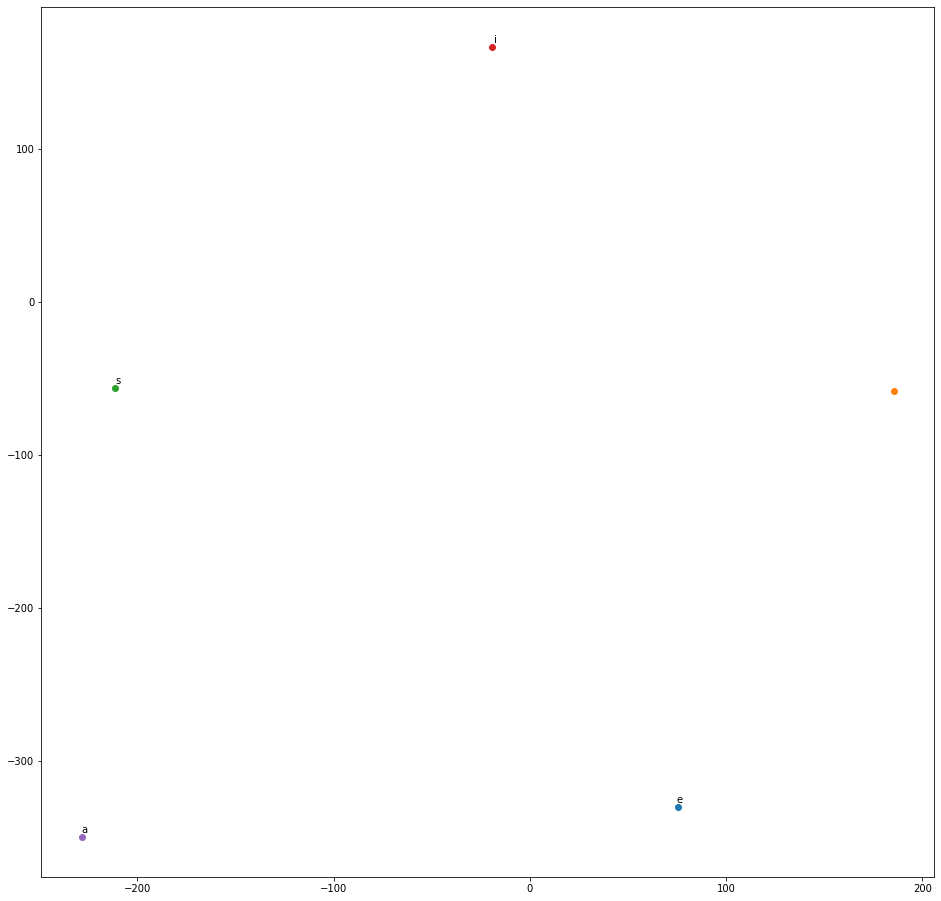

In [ ]:
tsne_plot(model1)

## Spacy

In [10]:
!pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")
doc=nlp(text)
print(doc.ents)


(Europe, ™, India?In India, Congress, Mahatma Gandhi, one, India, the first decade of the twentieth century, the 1920s, Congress, 1, April 1919.Mass, India, World War, Khilafat, Non-CooperationIn, the years after 1919, Œdoubling, between 1913 and 1918, 1918-19, 1920-21, India, 1921, 12, 13, The Idea of SatyagrahaMahatma Gandhi, India, January 1915, South Africa, Fig, 2, Indian, SouthAfrica, Volksrust, 6November 1913, Mahatma Gandhi, Newcastle, Gandhiji, thousands, Mahatma Gandhi, Indians, India, Mahatma Gandhi, 1917, Bihar, 1917, Kheda, Gujarat, Kheda, 1918, Mahatma Gandhi, Ahmedabad, 1.2, Gandhiji, 1919, Rowlatt Act, 1919, Act, Imperial, Indian, Mahatma Gandhi, 6 April, British, Mahatma Gandhi, Delhi, 10 April, Amritsar, General Dyer, Mahatma Gandhi, Satyagraha‚It, South Africa, Satyagraha, Satyagraha, India, Britain, Europe, British, hundreds of millions, India, ™SourceSource ARead, MahatmaGandhi, Contemporary, April, Jallianwalla Bagh, Onthat day, JallianwallaBagh, ™, annual, Baisak

## Yake

In [ ]:
!pip install yake
import yake
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.1
numOfKeywords = 10
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('Civil Disobedience Movement', 0.0002537752002096307)
('Mahatma Gandhi', 0.0005258563048433801)
('World', 0.012711255418225736)
('2020-21', 0.017017205815546874)
('Nehru', 0.01880489946611769)
('Fig.', 0.023016184516453538)
('group', 0.07858279414784748)
('law', 0.09112306116655194)
('Quit', 0.10117857029585454)
('symbol', 0.14439514450282545)


## gensim

In [ ]:
from gensim.summarization import keywords
print(keywords(text))

movement
movements
india
people
indians
nationalism
nation
national
gandhiji
indian workers
news
differently
differing
differences
differ
began
british
gandhi
fig
figs
congress
government
governing
mahatma
communities
communication
community
communal
communalism
peasants
peasant
different groups
political
politics
politically
demanding
demanded
demand
demands
foreign
new symbols
activities
activity
active
nationalists
nationalist
colonies
colonialism
forced
force
forcing
forces
hindus
muslims
muslim
laws
law
came
leader
swaraj
like
police
import
important
imports
importance
satyagraha
march
marches
colonial state
nehru
revenue
revenues
masses
imported clothes
jawaharlal
non
hindu religious
organised
organise
organising
organisation
organisations
widespread
collection
collect
collective
collecting
participated
participate
participation
participants
participating
repress
repressive
repression
areas
area
taxes
economic
economically
group felt
local leaders
attacks
attacked
folk
council
co

# Sentence Similarity

In [ ]:
#Sentence similarity
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')
embeddings = model.encode(sentences)
print(embeddings)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
dst_1 = cosine_similarity(np.array(embeddings[0]).reshape(1,-1), 
                           np.array(embeddings[1]).reshape(1,-1))
print(dst_1)

In [ ]:
import nltk
nltk.download("punkt")
from nltk.tokenize import sent_tokenize
list1=[]
length=0
list1=sent_tokenize(text1)


embedding=model.encode(list1)
for i in list1:
  length=length+1
print(length)
cos=[]
for i in range(0,length):
  dst_1 = cosine_similarity(np.array(embedding[0]).reshape(1,-1), 
                           np.array(embedding[i]).reshape(1,-1))
  cos.append(dst_1)
  print(cos[i])

  
  
  
  


In [ ]:
m=max(cos[1:])
print(m)
index=cos.index(m)
print(list1[index])

In [ ]:
!git clone https://github.com/huggingface/transformers.git
!cd transformers
!pip install .

In [ ]:
!pip install sentence_transformers

In [ ]:
import scipy
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
corpus=[i for i in text.split('\n')if i != ''and len(i.split(' '))>=4]

In [ ]:
corpus_embeddings = model.encode(corpus)

In [ ]:
queries = [
    'Afforestation and propermanagement of grazing can help']
query_embeddings = model.encode(queries)

In [ ]:
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(corpus[idx].strip(), "(Score: %.4f)" % (1-distance))

# Relationship extraction

In [ ]:
!pip install daterangeparser
from daterangeparser import parse

In [ ]:
#relationship extraction
nlp = spacy.load("en_core_web_sm")
doc = nlp("After the fall of the Western Roman Empire in the 5th century, the Franks, like other post-Roman Western Europeans, emerged as a tribal confederacy in the Middle Rhine-Weser region, among the territory soon to be called Austrasia (the 'eastern land'), the northeastern portion of the future Kingdom of the Merovingian Franks.")
for ent in doc.ents:
  print("{} -> {}".format(ent.text,ent.label_))

In [ ]:
doc = nlp(text)
for ent in filter(lambda e: e.label_=='DATE',doc.ents):
  print(ent.text)

In [ ]:
import re
def dep_subtree(token, dep):
  deps =[child.dep_ for child in token.children]
  child=next(filter(lambda c: c.dep_==dep, token.children), None)
  if child != None:
    return " ".join([c.text for c in child.subtree])
  else:
    return ""

# to remove citations, e.g. "[91]" as this makes problems with spaCy
p = re.compile(r'\[\d+\]')

def extract_events_spacy(line):
  line=p.sub('', line)
  events = []
  doc = nlp(line)
  for ent in filter(lambda e: e.label_=='DATE',doc.ents):
    try:
      start,end = parse(ent.text)
    except:
      # could not parse the dates, hence ignore it
      continue
    current = ent.root
    while current.dep_ != "ROOT":
      current = current.head
    desc = " ".join(filter(None,[
                                 dep_subtree(current,"nsubj"),
                                 dep_subtree(current,"nsubjpass"),
                                 dep_subtree(current,"auxpass"),
                                 dep_subtree(current,"amod"),
                                 dep_subtree(current,"det"),
                                 current.text, 
                                 dep_subtree(current,"acl"),
                                 dep_subtree(current,"dobj"),
                                 dep_subtree(current,"attr"),
                                 dep_subtree(current,"advmod")]))
    events = events + [(start,ent.text,desc)]
  return events

In [ ]:
extract_events_spacy("The Protestant Reformation was the first successful challenge to the Catholic Church and began in 1521 as Luther was outlawed at the Diet of Worms after his refusal to repent. ")

In [ ]:
def extract_events_regex(line):
  matches = []
  # capture thee digit and four digit years (1975) and ranges (1975-1976)
  found = re.findall('In (\d\d\d\d?[/\–]?\d?\d?\d?\d?),? ?([^\\.]*)', line)
  try:
    matches = matches + list(map(lambda f: (f[0] if len(f[0])>3 else "0"+f[0] ,f[0],f[1]),found))
  except:
   return []
  return matches
  
def extract_all_events(text, extract_function):
  all_events = []
  processed = 0
  # Process the events
  for processed,line in enumerate(text.splitlines()):
    events = extract_function(line)
    all_events = all_events + events
    if processed % 100 == 0:
      print('Processed: {}'.format(processed))

  print("Extracted {} events.".format(len(all_events)))

  # Print out the events
  for event in sorted(all_events, key=lambda e: e[0]):
    print("{} - {}".format(event[1],event[2]))

In [ ]:
extract_all_events(text,extract_events_spacy)

# Evaluation in hindi

Evaluation of Hindi textbooks 

In [ ]:
!pip install pdfminer.six

In [ ]:
!pip install io

In [ ]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)

    with open(path, 'rb') as fp:
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        password = ""
        caching = True
        pagenos = set()

        for page in PDFPage.get_pages(fp, pagenos, password=password,caching=caching, check_extractable=True):
            interpreter.process_page(page)

        text = retstr.getvalue()

    device.close()
    retstr.close()
  
    return text

text=convert_pdf_to_txt("/content/jhss101.pdf")
text

In [ ]:
!pip install unicode

In [ ]:
import PyPDF2
text=''
text1=''
FILE_PATH = '/content/jhss101.pdf'

with open(FILE_PATH, mode='rb') as f:

    reader = PyPDF2.PdfFileReader(f)
    num=reader.getNumPages()
    for i in range(num):
      page=reader.getPage(i)
      text=text+page.extractText()
    print(text.encode('utf-8'))
    text1=(reader.getPage(1)).extractText() 

    

In [ ]:
pip install pdf2image

In [ ]:
from pdf2image import convert_from_path
images = convert_from_path('/content/jhss101.pdf')
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')